In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_altered = df_original.copy()

In [5]:
countries = ['Poland', 'Lithuania', 'Latvia', 'Estonia']
df_PLBAL = df_altered[(df_altered['job_country'].isin(countries))].copy()
df_PLBAL = df_DA_PLBAL.dropna(subset=['salary_year_avg'])

In [8]:
job_title = df_PLBAL['job_title_short'].value_counts().index[:6].tolist()

In [33]:
df_PLBAL_top6 = df_PLBAL[df_PLBAL['job_title_short'].isin(job_title)]

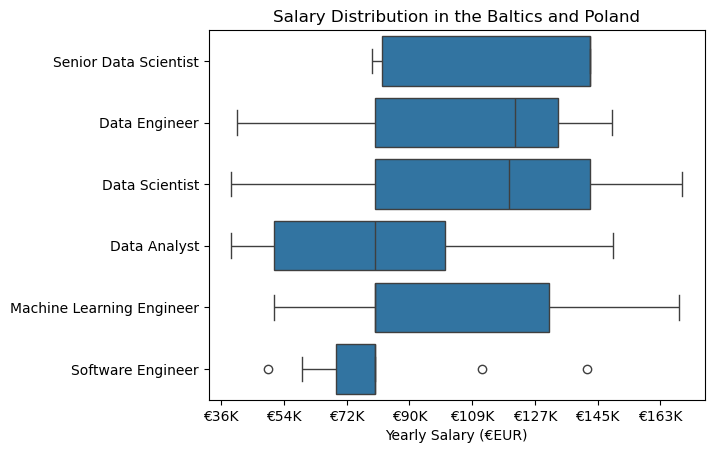

In [41]:
job_order = df_PLBAL_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
sns.boxplot(data=df_PLBAL_top6, x='salary_year_avg', y='job_title_short', order=job_order)
plt.title('Salary Distribution in the Baltics and Poland') 
plt.xlabel('Yearly Salary (€EUR)') 
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda x, position: f'€{int(x/1100)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [61]:
df_DA_PLBAL = df_altered[(df_altered['job_country'].isin(countries)) & (df_altered['job_title_short']=='Data Analyst')].copy()

In [64]:
df_DA_PLBAL = df_DA_PLBAL.dropna(subset=['salary_year_avg'])
df_DA_PLBAL = df_DA_PLBAL.explode('job_skills')

In [69]:
df_DA_top_pay = df_DA_PLBAL.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

In [73]:
df_DA_top_skills = df_DA_PLBAL.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_top_skills = df_DA_top_skills.head(10).sort_values(by='median', ascending=False)

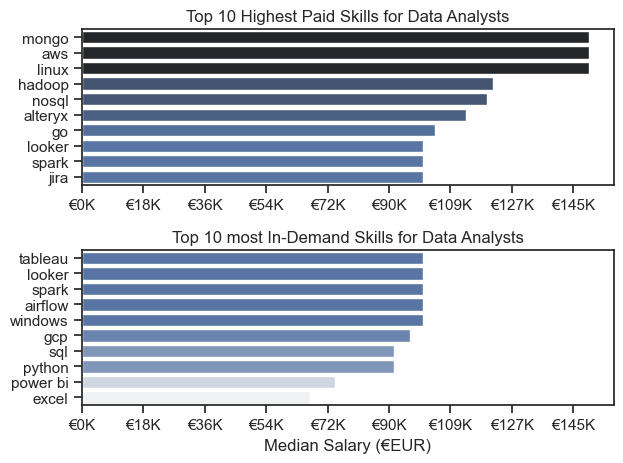

In [78]:
fig, ax = plt.subplots(2 , 1)

sns.set_theme(style="ticks")
#df_DA_US_TOP_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # or ax[0].invert_yaxis() ro reverse
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
# df_DA_US_TOP_Skills_Count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_top_skills, x='median', y=df_DA_top_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts') 
ax[0].set_ylabel('') 
ax[0].set_xlabel('')
ax[1].set_title('Top 10 most In-Demand Skills for Data Analysts') 
ax[1].set_ylabel('') 
ax[1].set_xlabel('Median Salary (€EUR)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'€{int(x/1100)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'€{int(x/1100)}K'))
ax[1].set_xlim(ax[0].get_xlim()) #matches axes
fig.tight_layout() 
plt.show()